<a href="https://colab.research.google.com/github/DavidMrtz8/Tarea3.1/blob/main/David_Membre%C3%B1o_Tarea3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_csv('U4_01_housing.csv')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

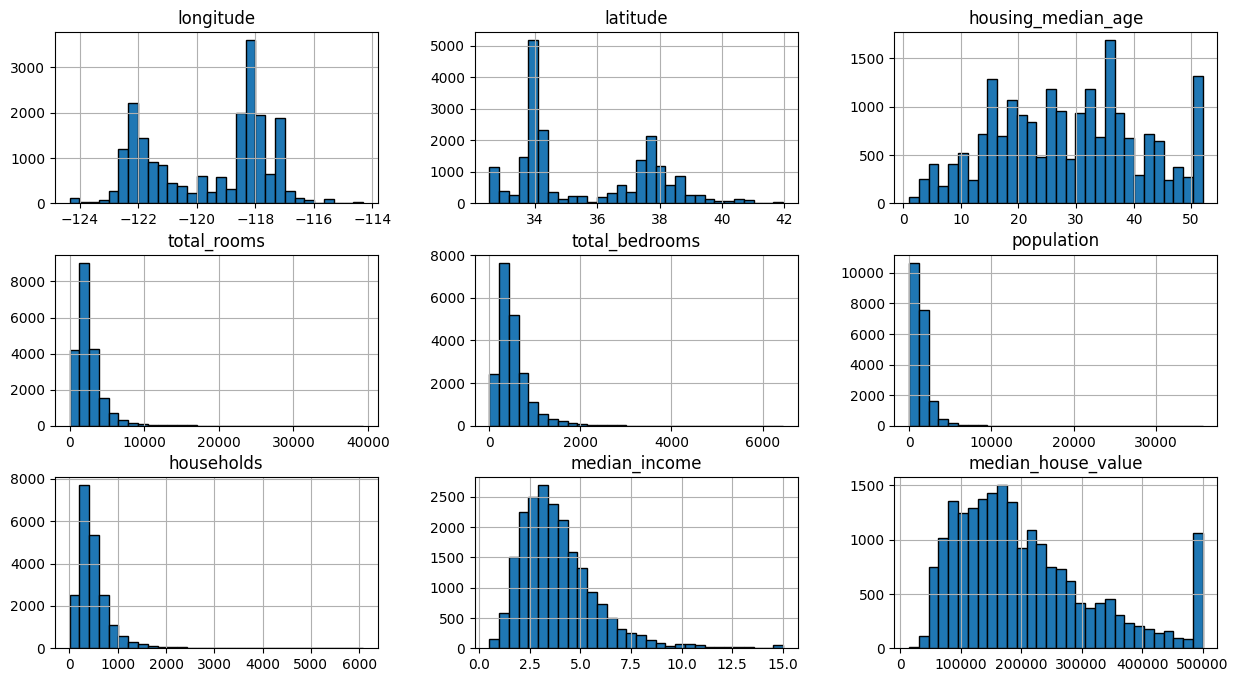

In [ ]:
datos.hist( figsize=(15,8), bins=30, edgecolor = 'black' )

In [ ]:
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)

datos = datos.join(dummies)

datos = datos.drop(['ocean_proximity'], axis=1)

In [ ]:
datos['room_ratio'] = datos['total_bedrooms'] /  datos['total_rooms']

In [ ]:
X = datos.drop(['median_house_value'], axis=1) 

y = datos['median_house_value']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.2)

#Utilizo SimpleImputer para manejar los valores faltantes utilizando la mediana de los datos disponibles
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
modelo = DecisionTreeRegressor(max_depth=10, random_state=42)
modelo.fit(X_train, y_train) 

predicciones = modelo.predict(X_test)

In [ ]:
comparativa = { 'predicciones': predicciones, 'Valor original': y_test }
pd.DataFrame(comparativa)

,predicciones,Valor original
5205,181300.735294,105700.0
7552,139417.446809,128100.0
5586,352367.898305,268300.0
5696,219650.000000,312100.0
18088,407606.931034,420000.0
...,...,...
19040,126170.652174,135600.0
9501,133780.769231,176100.0
18991,154373.780488,281200.0
7095,205966.512702,210400.0


In [ ]:
print(modelo.score(X_train, y_train))
print(modelo.score(X_test, y_test))

0.8264277686109136
0.7165613231420326


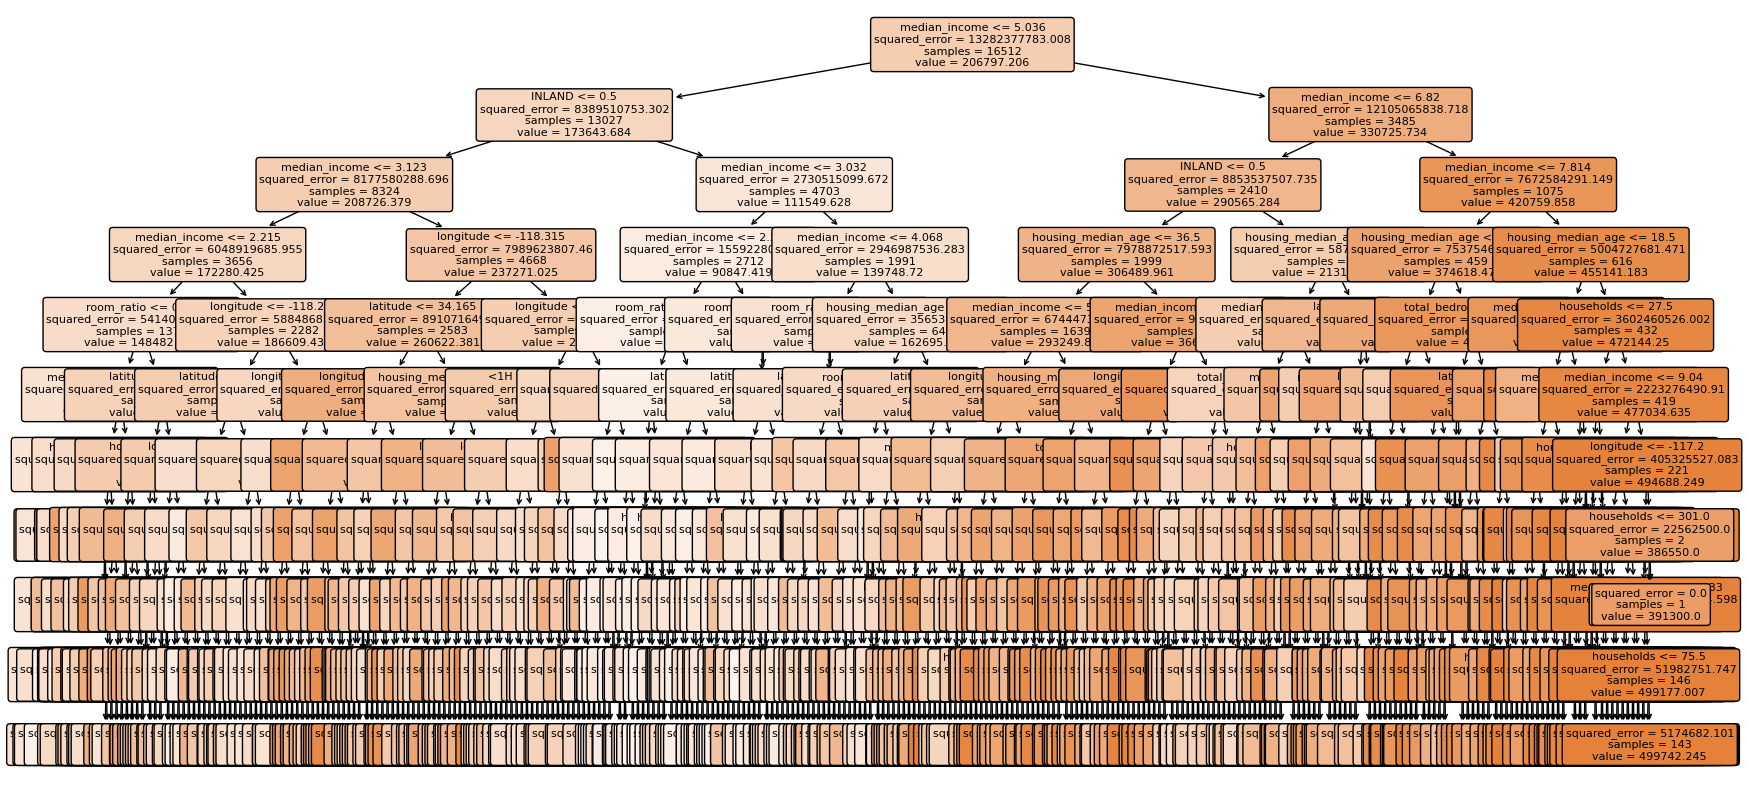

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()
